## Naval Mine AI Program: Roack or Mine Identifier

Tensor flow - Tensors are the standard way of representing data in deep learning. These are multidimensional arrays, an extension to two dimensional tables to data with higher dimension.


1. Building a computational graph to create datastructures(constants, placeholders, variables) and functions.
2. Running a computational graph in tensorflow sessions.

General Model creation steps:

1. Read dataset and create appropriate variables(X, y, W, b)
2. Model to predict
2. Loss function - how far predicted output is from desired output.
3. Minimize the loss function - Optimizer (user argument learning rate) - Gives New W and b
4. Evaluate accuracy

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


# Reading the dataset

def read_dataset():
    df = pd.read_csv("C:\\Users\\hmnsh\\repos\\edureka\\sonar\\sonar.csv")
    X = df[df.columns[0:60]].values
    y = df[df.columns[60]]
    # Encode the dependent variable
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)  # capital Y
    print(X.shape)
    return (X, Y)


def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode


# Read the dataset

X, Y = read_dataset()

# shuffle rows

X, Y = shuffle(X, Y, random_state=1)

# train and test split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

# print shapes of data

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

# params and tensor varibles

learning_rate = 0.3
training_epochs = 1000
cost_history = np.empty(shape=[1], dtype=float)  # loss function
n_dim = X.shape[1]
print("ndim:", n_dim)

n_class = 2
model_path = "C:\\Users\\hmnsh\\repos\\edureka\\sonar"

# Hidden layer details and neurons for each layer

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim])
y_ = tf.placeholder(tf.float32, [None, n_class])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))


# Define the model

def multilayer_perc(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # hidden layer 1 with sigmoid activation

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # hidden layer 2 with sigmoid activation

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # hidden layer 3 with sigmoid activation

    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # hidden layer 4 with relu activation

    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return out_layer


# weights and biases for each layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
}

# Initialize all variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()

# call model

y = multilayer_perc(x, weights, biases)

# define cost function and optimizer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

# cost and accuracy

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print( "Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y: test_y} )))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy, feed_dict={x: train_x, y_: train_y})
    accuracy_history.append(accuracy)

    print('epoch ', epoch, '-cost ', cost, '-mse', mse, '-Train Accuracy', accuracy)

save_path = saver.save(sess, model_path)
print('Model Saved in file: %s' % save_path)

# plot mse and accuracy graph

plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

# print the final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ', (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

# Print the final mse

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE: %.4f' % sess.run(mse))


In [1]:
#Load Pre-requisite libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
columns = list(range(0, 61))
df = pd.read_csv("C:\\Users\\hmnsh\\repos\\edureka\\sonar\\sonar.csv", names=columns, index_col=False)
df.shape

(208, 61)

In [3]:
X = df[df.columns[0:60]].values
y = df[df.columns[60]]

In [4]:
y1 = df[df.columns[60]]

In [5]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)
Y.shape

(208, 2)

In [6]:
# shuffle rows

X, Y = shuffle(X, Y, random_state=1)

# train and test split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

In [7]:
# print shapes of data splits

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(166, 60)
(166, 2)
(42, 60)
(42, 2)


In [8]:
# params and tensor varibles

learning_rate = 0.3 # loss minimizing steps
training_epochs = 800 # number of iterations to minimize W and b
cost_history = np.empty(shape=[1], dtype=float)  # mse values
n_dim = X.shape[1] # Number of columns
print("ndim:", n_dim)

n_class = 2 
model_path = "C:\\Users\\hmnsh\\repos\\edureka\\sonar"

ndim: 60


In [9]:
# Hidden layer details and neurons for each layer

n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim]) # for each row input
y_ = tf.placeholder(tf.float32, [None, n_class]) # for each row output
W = tf.Variable(tf.zeros([n_dim, n_class])) #intialized weights to zeros
b = tf.Variable(tf.zeros([n_class])) #intialized biases to zeros

In [10]:
# weights and biases for each layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class])),
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
}

# Initialize all variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()

In [11]:
# Define the model

def multilayer_perc(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # hidden layer 1 with sigmoid activation

    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # hidden layer 2 with sigmoid activation

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    # hidden layer 3 with sigmoid activation

    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # hidden layer 4 with relu activation

    out_layer = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    return out_layer

# call model

y = multilayer_perc(x, weights, biases)

# define cost function and optimizer

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
# cost and accuracy

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # print( "Accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y: test_y} )))
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = sess.run(accuracy, feed_dict={x: train_x, y_: train_y})
    accuracy_history.append(accuracy)

    print('epoch ', epoch, '-cost ', cost, '-mse', mse, '-Train Accuracy', accuracy)

save_path = saver.save(sess, model_path)
print('Model Saved in file: %s' % save_path)

epoch  0 -cost  202.21844 -mse Tensor("Mean_2:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  1 -cost  20.203728 -mse Tensor("Mean_4:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  2 -cost  5.2053237 -mse Tensor("Mean_6:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  3 -cost  0.779822 -mse Tensor("Mean_8:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  4 -cost  0.6952335 -mse Tensor("Mean_10:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  5 -cost  0.694377 -mse Tensor("Mean_12:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  6 -cost  0.6933224 -mse Tensor("Mean_14:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  7 -cost  0.6905894 -mse Tensor("Mean_16:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  8 -cost  0.68674105 -mse Tensor("Mean_18:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  9 -cost  0.68495417 -mse Tensor("Mean_20:0", shape=(), dtype=float64) -Train A

epoch  82 -cost  0.65092874 -mse Tensor("Mean_166:0", shape=(), dtype=float64) -Train Accuracy 0.62650603
epoch  83 -cost  0.5828706 -mse Tensor("Mean_168:0", shape=(), dtype=float64) -Train Accuracy 0.6987952
epoch  84 -cost  0.5932261 -mse Tensor("Mean_170:0", shape=(), dtype=float64) -Train Accuracy 0.6807229
epoch  85 -cost  0.7151395 -mse Tensor("Mean_172:0", shape=(), dtype=float64) -Train Accuracy 0.56626505
epoch  86 -cost  0.7266509 -mse Tensor("Mean_174:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  87 -cost  0.7064814 -mse Tensor("Mean_176:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  88 -cost  0.69991964 -mse Tensor("Mean_178:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  89 -cost  0.6952415 -mse Tensor("Mean_180:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  90 -cost  0.69068956 -mse Tensor("Mean_182:0", shape=(), dtype=float64) -Train Accuracy 0.5481928
epoch  91 -cost  0.68668103 -mse Tensor("Mean_184:0", shape

epoch  162 -cost  0.7411112 -mse Tensor("Mean_326:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  163 -cost  0.683908 -mse Tensor("Mean_328:0", shape=(), dtype=float64) -Train Accuracy 0.5301205
epoch  164 -cost  0.6191044 -mse Tensor("Mean_330:0", shape=(), dtype=float64) -Train Accuracy 0.6987952
epoch  165 -cost  0.56726706 -mse Tensor("Mean_332:0", shape=(), dtype=float64) -Train Accuracy 0.7108434
epoch  166 -cost  0.55176485 -mse Tensor("Mean_334:0", shape=(), dtype=float64) -Train Accuracy 0.8012048
epoch  167 -cost  0.57686883 -mse Tensor("Mean_336:0", shape=(), dtype=float64) -Train Accuracy 0.6927711
epoch  168 -cost  0.6993417 -mse Tensor("Mean_338:0", shape=(), dtype=float64) -Train Accuracy 0.5301205
epoch  169 -cost  0.5956278 -mse Tensor("Mean_340:0", shape=(), dtype=float64) -Train Accuracy 0.75301206
epoch  170 -cost  0.64737207 -mse Tensor("Mean_342:0", shape=(), dtype=float64) -Train Accuracy 0.61445785
epoch  171 -cost  0.7412943 -mse Tensor("Mean_344

epoch  241 -cost  0.6129689 -mse Tensor("Mean_484:0", shape=(), dtype=float64) -Train Accuracy 0.7289157
epoch  242 -cost  0.60017174 -mse Tensor("Mean_486:0", shape=(), dtype=float64) -Train Accuracy 0.73493975
epoch  243 -cost  0.58844143 -mse Tensor("Mean_488:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  244 -cost  0.57539684 -mse Tensor("Mean_490:0", shape=(), dtype=float64) -Train Accuracy 0.72289157
epoch  245 -cost  0.55538267 -mse Tensor("Mean_492:0", shape=(), dtype=float64) -Train Accuracy 0.8072289
epoch  246 -cost  0.52365494 -mse Tensor("Mean_494:0", shape=(), dtype=float64) -Train Accuracy 0.6987952
epoch  247 -cost  0.524736 -mse Tensor("Mean_496:0", shape=(), dtype=float64) -Train Accuracy 0.78313255
epoch  248 -cost  0.68900216 -mse Tensor("Mean_498:0", shape=(), dtype=float64) -Train Accuracy 0.62650603
epoch  249 -cost  0.89225155 -mse Tensor("Mean_500:0", shape=(), dtype=float64) -Train Accuracy 0.45180723
epoch  250 -cost  0.69877064 -mse Tensor("M

epoch  319 -cost  0.6882618 -mse Tensor("Mean_640:0", shape=(), dtype=float64) -Train Accuracy 0.560241
epoch  320 -cost  0.6615945 -mse Tensor("Mean_642:0", shape=(), dtype=float64) -Train Accuracy 0.6084337
epoch  321 -cost  0.59621704 -mse Tensor("Mean_644:0", shape=(), dtype=float64) -Train Accuracy 0.70481926
epoch  322 -cost  0.54018176 -mse Tensor("Mean_646:0", shape=(), dtype=float64) -Train Accuracy 0.7409639
epoch  323 -cost  0.5423079 -mse Tensor("Mean_648:0", shape=(), dtype=float64) -Train Accuracy 0.73493975
epoch  324 -cost  0.5546601 -mse Tensor("Mean_650:0", shape=(), dtype=float64) -Train Accuracy 0.7289157
epoch  325 -cost  0.66104794 -mse Tensor("Mean_652:0", shape=(), dtype=float64) -Train Accuracy 0.6084337
epoch  326 -cost  0.5654087 -mse Tensor("Mean_654:0", shape=(), dtype=float64) -Train Accuracy 0.71686745
epoch  327 -cost  0.5166507 -mse Tensor("Mean_656:0", shape=(), dtype=float64) -Train Accuracy 0.74698794
epoch  328 -cost  0.5957247 -mse Tensor("Mean_658

epoch  398 -cost  0.47181347 -mse Tensor("Mean_798:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  399 -cost  0.48427495 -mse Tensor("Mean_800:0", shape=(), dtype=float64) -Train Accuracy 0.7891566
epoch  400 -cost  0.45530474 -mse Tensor("Mean_802:0", shape=(), dtype=float64) -Train Accuracy 0.79518074
epoch  401 -cost  0.5137916 -mse Tensor("Mean_804:0", shape=(), dtype=float64) -Train Accuracy 0.7289157
epoch  402 -cost  0.53749174 -mse Tensor("Mean_806:0", shape=(), dtype=float64) -Train Accuracy 0.7289157
epoch  403 -cost  0.72779816 -mse Tensor("Mean_808:0", shape=(), dtype=float64) -Train Accuracy 0.53614455
epoch  404 -cost  0.5198257 -mse Tensor("Mean_810:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  405 -cost  0.47864196 -mse Tensor("Mean_812:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  406 -cost  0.49424598 -mse Tensor("Mean_814:0", shape=(), dtype=float64) -Train Accuracy 0.77710843
epoch  407 -cost  0.44611552 -mse Tensor("

epoch  476 -cost  0.577606 -mse Tensor("Mean_954:0", shape=(), dtype=float64) -Train Accuracy 0.61445785
epoch  477 -cost  0.48753762 -mse Tensor("Mean_956:0", shape=(), dtype=float64) -Train Accuracy 0.71686745
epoch  478 -cost  0.3864039 -mse Tensor("Mean_958:0", shape=(), dtype=float64) -Train Accuracy 0.8373494
epoch  479 -cost  0.3674273 -mse Tensor("Mean_960:0", shape=(), dtype=float64) -Train Accuracy 0.82530123
epoch  480 -cost  0.36214623 -mse Tensor("Mean_962:0", shape=(), dtype=float64) -Train Accuracy 0.8313253
epoch  481 -cost  0.35945562 -mse Tensor("Mean_964:0", shape=(), dtype=float64) -Train Accuracy 0.813253
epoch  482 -cost  0.36172742 -mse Tensor("Mean_966:0", shape=(), dtype=float64) -Train Accuracy 0.8373494
epoch  483 -cost  0.37011194 -mse Tensor("Mean_968:0", shape=(), dtype=float64) -Train Accuracy 0.82530123
epoch  484 -cost  0.3928311 -mse Tensor("Mean_970:0", shape=(), dtype=float64) -Train Accuracy 0.8192771
epoch  485 -cost  0.5396641 -mse Tensor("Mean_97

epoch  553 -cost  0.35273138 -mse Tensor("Mean_1108:0", shape=(), dtype=float64) -Train Accuracy 0.8373494
epoch  554 -cost  0.53419954 -mse Tensor("Mean_1110:0", shape=(), dtype=float64) -Train Accuracy 0.71686745
epoch  555 -cost  0.38766304 -mse Tensor("Mean_1112:0", shape=(), dtype=float64) -Train Accuracy 0.813253
epoch  556 -cost  0.36747497 -mse Tensor("Mean_1114:0", shape=(), dtype=float64) -Train Accuracy 0.813253
epoch  557 -cost  0.30676663 -mse Tensor("Mean_1116:0", shape=(), dtype=float64) -Train Accuracy 0.85542166
epoch  558 -cost  0.33151612 -mse Tensor("Mean_1118:0", shape=(), dtype=float64) -Train Accuracy 0.8674699
epoch  559 -cost  0.43705985 -mse Tensor("Mean_1120:0", shape=(), dtype=float64) -Train Accuracy 0.7710843
epoch  560 -cost  0.8473255 -mse Tensor("Mean_1122:0", shape=(), dtype=float64) -Train Accuracy 0.6084337
epoch  561 -cost  0.5278193 -mse Tensor("Mean_1124:0", shape=(), dtype=float64) -Train Accuracy 0.76506025
epoch  562 -cost  0.44526044 -mse Tens

epoch  630 -cost  0.3511919 -mse Tensor("Mean_1262:0", shape=(), dtype=float64) -Train Accuracy 0.8313253
epoch  631 -cost  0.8541363 -mse Tensor("Mean_1264:0", shape=(), dtype=float64) -Train Accuracy 0.6506024
epoch  632 -cost  0.44268578 -mse Tensor("Mean_1266:0", shape=(), dtype=float64) -Train Accuracy 0.813253
epoch  633 -cost  0.38218543 -mse Tensor("Mean_1268:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  634 -cost  0.33715472 -mse Tensor("Mean_1270:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  635 -cost  0.29045206 -mse Tensor("Mean_1272:0", shape=(), dtype=float64) -Train Accuracy 0.89759034
epoch  636 -cost  0.25457418 -mse Tensor("Mean_1274:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  637 -cost  0.24749748 -mse Tensor("Mean_1276:0", shape=(), dtype=float64) -Train Accuracy 0.87349397
epoch  638 -cost  0.27529722 -mse Tensor("Mean_1278:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  639 -cost  0.5408758 -mse T

epoch  707 -cost  0.2502343 -mse Tensor("Mean_1416:0", shape=(), dtype=float64) -Train Accuracy 0.8915663
epoch  708 -cost  0.23445392 -mse Tensor("Mean_1418:0", shape=(), dtype=float64) -Train Accuracy 0.8915663
epoch  709 -cost  0.22989179 -mse Tensor("Mean_1420:0", shape=(), dtype=float64) -Train Accuracy 0.90361446
epoch  710 -cost  0.22681864 -mse Tensor("Mean_1422:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  711 -cost  0.238669 -mse Tensor("Mean_1424:0", shape=(), dtype=float64) -Train Accuracy 0.90361446
epoch  712 -cost  0.3479195 -mse Tensor("Mean_1426:0", shape=(), dtype=float64) -Train Accuracy 0.8192771
epoch  713 -cost  0.8494612 -mse Tensor("Mean_1428:0", shape=(), dtype=float64) -Train Accuracy 0.6566265
epoch  714 -cost  0.4129675 -mse Tensor("Mean_1430:0", shape=(), dtype=float64) -Train Accuracy 0.8795181
epoch  715 -cost  0.34316126 -mse Tensor("Mean_1432:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  716 -cost  0.30115715 -mse Tenso

epoch  784 -cost  0.25110176 -mse Tensor("Mean_1570:0", shape=(), dtype=float64) -Train Accuracy 0.87349397
epoch  785 -cost  0.4460735 -mse Tensor("Mean_1572:0", shape=(), dtype=float64) -Train Accuracy 0.75301206
epoch  786 -cost  0.2532825 -mse Tensor("Mean_1574:0", shape=(), dtype=float64) -Train Accuracy 0.93373495
epoch  787 -cost  0.2254383 -mse Tensor("Mean_1576:0", shape=(), dtype=float64) -Train Accuracy 0.90361446
epoch  788 -cost  0.2730894 -mse Tensor("Mean_1578:0", shape=(), dtype=float64) -Train Accuracy 0.85542166
epoch  789 -cost  0.25334746 -mse Tensor("Mean_1580:0", shape=(), dtype=float64) -Train Accuracy 0.8795181
epoch  790 -cost  0.468504 -mse Tensor("Mean_1582:0", shape=(), dtype=float64) -Train Accuracy 0.7409639
epoch  791 -cost  0.2599263 -mse Tensor("Mean_1584:0", shape=(), dtype=float64) -Train Accuracy 0.93373495
epoch  792 -cost  0.25575772 -mse Tensor("Mean_1586:0", shape=(), dtype=float64) -Train Accuracy 0.88554215
epoch  793 -cost  0.36992833 -mse Ten

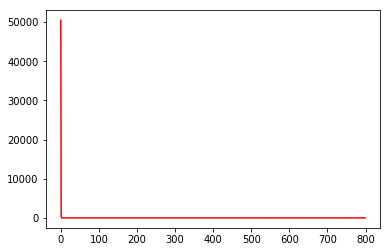

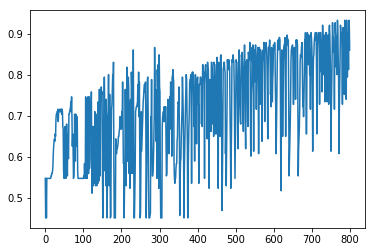

In [13]:
# plot mse and accuracy graph

plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [14]:
# print the final accuracy

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test Accuracy: ', (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy:  0.71428573


In [15]:
# Print the final mse

pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE: %.4f' % sess.run(mse))

MSE: 5.5913


In [16]:
# Restore model and predict

saver.restore(sess, model_path)
prediction = tf.argmax(y, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(93, 101):
    prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1, 60)})
    accuracy_run = sess.run(accuracy, feed_dict={x: X[i].reshape(1, 60), y_: test_y})
    print("Original: ", y1[i],"predicted: ",prediction_run,"Accuracy: ", accuracy_run )

INFO:tensorflow:Restoring parameters from C:\Users\hmnsh\repos\edureka\sonar
Original:  R predicted:  [1] Accuracy:  0.52380955
Original:  R predicted:  [0] Accuracy:  0.47619048
Original:  R predicted:  [0] Accuracy:  0.47619048
Original:  R predicted:  [1] Accuracy:  0.52380955
Original:  M predicted:  [0] Accuracy:  0.47619048
Original:  M predicted:  [1] Accuracy:  0.52380955
Original:  M predicted:  [0] Accuracy:  0.47619048
Original:  M predicted:  [0] Accuracy:  0.47619048
